In [1]:
import pandas as pd
import numpy as np
import tabulate as tabualte 
pd.set_option('display.max_columns', 500)
import docx
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from pretty_confusion_matrix import pp_matrix
import seaborn as sns

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 14)    # fontsize of the tick labels
plt.rc('legend', fontsize= 14)    # legend fontsize

In [2]:
data = pd.read_csv('NIJ_s_Recidivism_Challenge_Full_Dataset.csv')
data.head(2)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,False,False,3 or more,3,False,2,2 or more,False,False,False,False,False,True,True,False,False,False,False,False,0,6,0,2,612.000000,0.0,0.0,0.0,0.0,0.488562,0.44761,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,True,False,3 or more,4 or more,True,0,2 or more,True,True,True,False,False,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.0,0.0,0.0,0.0,0.425234,2.00000,False,True,False,False,True,1


In [3]:
clean_data = data
#dummy variables 
clean_data = pd.get_dummies(data, columns=['Race','Gender', 'Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges',
                                    'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_PPViolationCharges',
                                    'Prior_Revocations_Parole','Prior_Revocations_Probation', 
                                    'Prison_Offense'],drop_first=True)

In [4]:
#picking the variavles to drop when creating x and y
drop=['ID','Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3','Training_Sample', 
      'Recidivism_Within_3years']

In [5]:
clean_data.head(2)

,ID,Age_at_Release,Residence_PUMA,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample,Race_WHITE,Gender_M,Gang_Affiliated_True,Prior_Arrest_Episodes_DVCharges_True,Prior_Conviction_Episodes_Viol_True,Prior_Conviction_Episodes_PPViolationCharges_True,Prior_Revocations_Parole_True,Prior_Revocations_Probation_True,Prison_Offense_Other,Prison_Offense_Property,Prison_Offense_Violent/Non-Sex,Prison_Offense_Violent/Sex
0,1,43-47,16,3.0,Standard,At least some college,3 or more,More than 3 years,6,6 or more,1,3,3,4,False,3 or more,3,2,2 or more,False,False,True,True,False,False,False,False,False,0,6,0,2,612.000000,0.0,0.0,0.0,0.0,0.488562,0.44761,False,False,False,False,False,1,0,1,0,0,0,0,0,0,0,0,0,0
1,2,33-37,16,6.0,Specialized,Less than HS diploma,1,More than 3 years,7,6 or more,3 or more,0,3,5 or more,False,3 or more,4 or more,0,2 or more,True,True,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.0,0.0,0.0,0.0,0.425234,2.00000,False,True,False,False,True,1,0,1,0,1,1,1,0,0,0,0,1,0


## Descriptive Stats

In [6]:
#data for descriptive stats
descriptive_stats = clean_data[['Recidivism_Within_3years', 'Prior_Revocations_Probation_True', 'Prior_Revocations_Parole_True',
                      'Prior_Conviction_Episodes_PPViolationCharges_True', 'Prior_Conviction_Episodes_Viol_True',
                      'Prior_Arrest_Episodes_DVCharges_True', 'Gang_Affiliated_True', 'Gender_M',
                      'Supervision_Risk_Score_First', 'Percent_Days_Employed']].describe().T.round(3)
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Prior_Revocations_Probation_True,25835.0,0.146,0.353,0.0,0.0,0.000,0.000,1.0
Prior_Revocations_Parole_True,25835.0,0.096,0.294,0.0,0.0,0.000,0.000,1.0
Prior_Conviction_Episodes_PPViolationCharges_True,25835.0,0.328,0.469,0.0,0.0,0.000,1.000,1.0
Prior_Conviction_Episodes_Viol_True,25835.0,0.325,0.468,0.0,0.0,0.000,1.000,1.0
Prior_Arrest_Episodes_DVCharges_True,25835.0,0.165,0.371,0.0,0.0,0.000,0.000,1.0
Gang_Affiliated_True,25835.0,0.152,0.359,0.0,0.0,0.000,0.000,1.0
Gender_M,25835.0,0.877,0.328,0.0,1.0,1.000,1.000,1.0
Supervision_Risk_Score_First,25360.0,6.082,2.381,1.0,4.0,6.000,8.000,10.0
Percent_Days_Employed,25373.0,0.482,0.425,0.0,0.0,0.476,0.969,1.0


In [7]:
#defining function to export table to a document
def export_table(dataframe, name):
    # open an existing document
    doc = docx.Document()

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(dataframe.shape[0]+1, dataframe.shape[1])

    # add the header rows.
    for j in range(dataframe.shape[-1]):
        t.cell(0,j).text = dataframe.columns[j]

    # add the rest of the data frame
    for i in range(dataframe.shape[0]):
        for j in range(dataframe.shape[-1]):
            t.cell(i+1,j).text = str(dataframe.values[i,j])

    # save the doc
    doc.save(name)

In [8]:
#commenting out so it doesnt keep saving as i run all 
#export_table(descriptive_stats, 'num.docx')

In [9]:
#same as above for categorical data
categorical_data = data[['Age_at_Release', 'Supervision_Level_First', 'Education_Level', 'Race', 'Prison_Offense',
            'Dependents', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
            'Prior_Arrest_Episodes_Violent']].describe(include='all').T
categorical_data

,count,unique,top,freq
Age_at_Release,25835,7,23-27,5176
Supervision_Level_First,24115,3,Standard,9983
Education_Level,25835,3,High School Diploma,11390
Race,25835,2,BLACK,14847
Prison_Offense,22558,5,Property,8284
Dependents,25835,4,0,8037
Prison_Years,25835,4,1-2 years,8084
Prior_Arrest_Episodes_Felony,25835,11,10 or more,6140
Prior_Arrest_Episodes_Violent,25835,4,0,11049


In [10]:
#commenting out so it doesnt keep saving as i run all 
#export_table(categorical_data, 'cat.docx')

Seeing how different variables are categorized and what the count is.

In [11]:
data.Education_Level.value_counts()

High School Diploma      11390
Less than HS diploma      9840
At least some college     4605
Name: Education_Level, dtype: int64

In [12]:
data.Prison_Offense.value_counts()

Property           8284
Violent/Non-Sex    5475
Drug               5190
Other              2779
Violent/Sex         830
Name: Prison_Offense, dtype: int64

In [13]:
data.Race.value_counts()

BLACK    14847
WHITE    10988
Name: Race, dtype: int64

## Graphs

In [14]:
def graph(df, col1, tick, title, xlab):
    #grouping and creating dataframe
    new= df.groupby([col1,'Recidivism_Within_3years']).size().reset_index()
    data =pd.DataFrame(new)
    #getting individual bar dfs to stack
    recidivism_false = data[data['Recidivism_Within_3years']==0]
    recidivism_true = data[data['Recidivism_Within_3years']==1]
    #graphing
    x_pos=np.arange(len(recidivism_false))
    tick_labels = tick
    plt.figure(figsize=(10, 8))
    plt.bar(x_pos - 0.2, recidivism_false[0], width=0.4, label='Recidivism False', color='#4f674f')
    plt.bar(x_pos + 0.2, recidivism_true[0], width=0.4, label='Recidivism True', color = '#b7cdb7')
    plt.xticks(x_pos, tick_labels)
    plt.title(title,  fontdict={'fontsize': 20})
    plt.xlabel(xlab,  fontdict={'fontsize': 16})
    plt.ylabel("Count", fontdict={'fontsize': 16})
    plt.legend()
    #commenting out so it doesnt keep saving as i run all 
    #plt.savefig('education_level.png')
    return  plt.show()

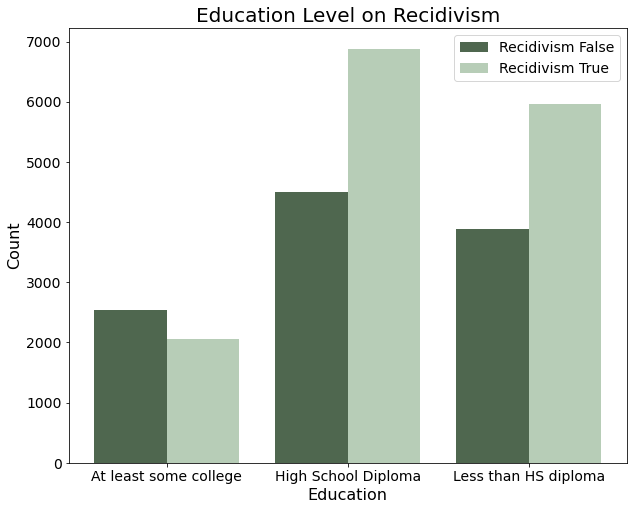

In [15]:
ticks = ['At least some college','High School Diploma','Less than HS diploma']
title= "Education Level on Recidivism"
xlab= "Education"
graph(clean_data, 'Education_Level', ticks, title, xlab)

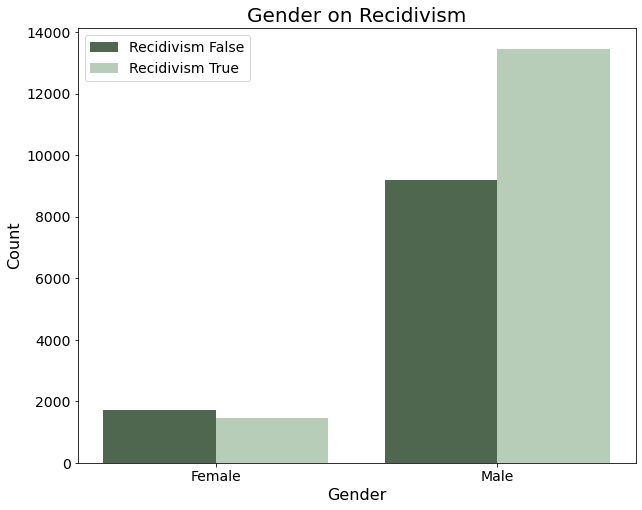

In [16]:
ticks= ['Female','Male']
title= 'Gender on Recidivism'
xlab= 'Gender'
graph(clean_data, 'Gender_M', ticks, title,xlab)

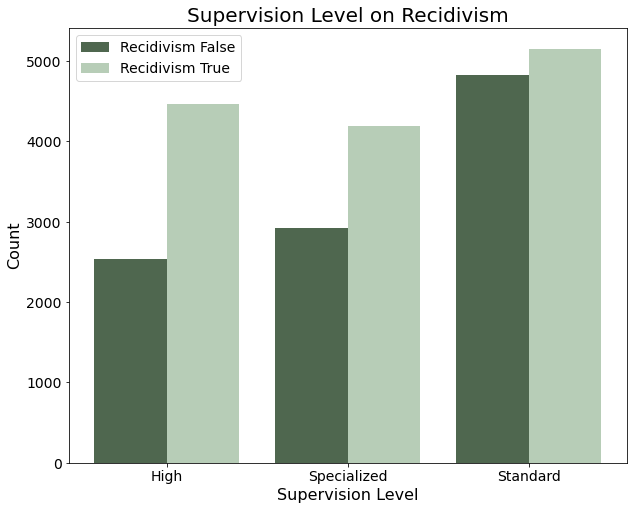

In [17]:
ticks= ['High','Specialized', 'Standard']
title= 'Supervision Level on Recidivism'
xlab= 'Supervision Level'
graph(clean_data, 'Supervision_Level_First', ticks, title,xlab)

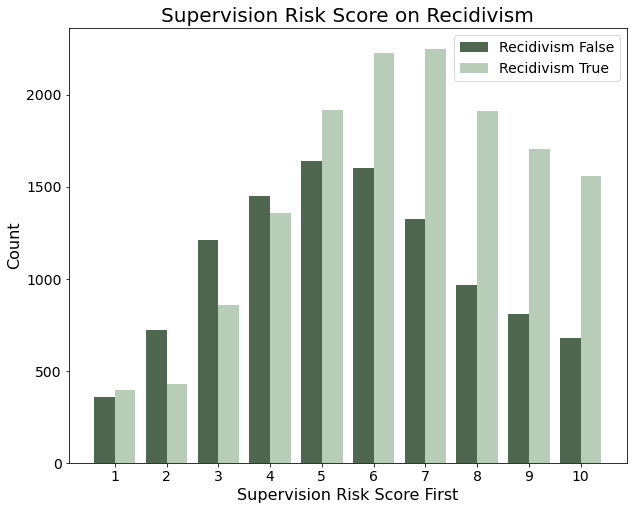

In [18]:
ticks= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
title= 'Supervision Risk Score on Recidivism'
xlab= 'Supervision Risk Score First'
graph(clean_data, 'Supervision_Risk_Score_First', ticks, title,xlab)


# Models Based on Lit Review and Domain Knowledge

In [19]:
#encoding full datadata 
clean_data = data.apply(LabelEncoder().fit_transform)

In [20]:
#running models
def run_model(model,Xtrain, ytrain,Xtest, ytest):
    model.fit(Xtrain, ytrain)
    score = model.score(Xtest, ytest)
    recall = recall_score(ytest, model.predict(Xtest))
    matrix = confusion_matrix(ytest, model.predict(Xtest))
    precision = precision_score(ytest, model.predict(Xtest))
    print(matrix)
    return score,recall, precision

In [21]:
#preparing data when scaling
def prepare_data(X,y,scale=True):
    #split and scale -- super important to scale makes model more accurate
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)
    if scale:
        sc = StandardScaler()
        Xtrain = sc.fit_transform(Xtrain)
        Xtest = sc.transform(Xtest)
    return Xtrain, Xtest, ytrain, ytest

In [22]:
#fancy confusion matrix 
def confusion_map(model, Xtest, ytest):
    confusion = confusion_matrix(ytest, model.predict(Xtest))
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in confusion.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in confusion.flatten()/np.sum(confusion)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(confusion, annot=labels, fmt='', cmap='Greens')

In [23]:
#handpicked dataframe
data_subset = clean_data[['Gender', 'Dependents',
                          'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 
                          'Recidivism_Within_3years', 'Age_at_Release', 'Supervision_Risk_Score_First', 
                          'Supervision_Level_First', 'Education_Level', 'Prison_Years',
                          'Prior_Arrest_Episodes_Felony','Prior_Arrest_Episodes_Misd',
                          'Program_Attendances', 'Percent_Days_Employed']]

In [24]:
data_subset = data_subset.dropna(axis=0)
data_subset.shape

(25835, 14)

In [25]:
#creating feature and targets
y = data_subset.Recidivism_Within_3years
X = data_subset.drop(['Recidivism_Within_3years'], axis=1)

Next I go through each model and run them with and without scaling to see the difference 

## Logistic

In [26]:
#run_model function returns score, recall, precision

### Regular 

In [27]:
#not using function because no scale
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)
logistic = LogisticRegression(max_iter= 500)

In [28]:
run_model(logistic,Xtrain, ytrain,Xtest, ytest)

[[1135 1046]
 [ 620 2366]]


(0.6775691890845752, 0.7923643670462157, 0.6934349355216881)

<AxesSubplot:>

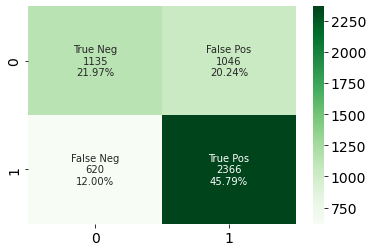

In [29]:
confusion_map(logistic, Xtest, ytest)

### With Scaling

In [30]:
Xtrain, Xtest, ytrain, ytest= prepare_data(X,y, scale=True)

In [31]:
run_model(logistic,Xtrain, ytrain,Xtest, ytest)

[[1132 1049]
 [ 611 2375]]


(0.6787304044900329, 0.7953784326858674, 0.6936331775700935)

<AxesSubplot:>

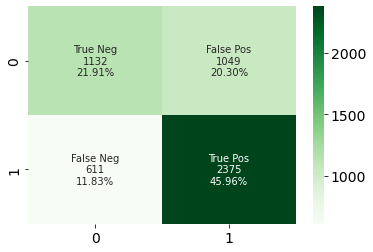

In [32]:
confusion_map(logistic, Xtest, ytest)

## SVM

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)

In [34]:
svc = SVC()
run_model(svc, Xtrain, ytrain,Xtest, ytest)

[[1142 1039]
 [ 796 2190]]


(0.6448616218308496, 0.7334226389819156, 0.6782285537318055)

<AxesSubplot:>

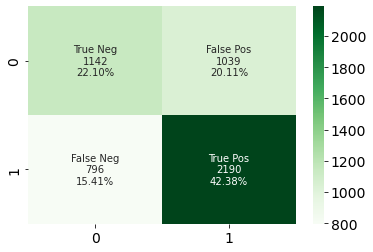

In [35]:
confusion_map(svc, Xtest, ytest)

### With Scaling 

In [36]:
Xtrain, Xtest, ytrain, ytest = prepare_data(X, y, scale= True)

In [37]:
run_model(svc, Xtrain, ytrain, Xtest, ytest)

[[1083 1098]
 [ 483 2503]]


(0.6940197406618928, 0.8382451440053583, 0.695084698694807)

<AxesSubplot:>

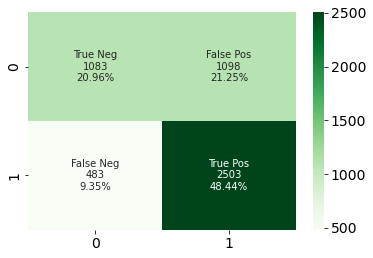

In [38]:
confusion_map(svc, Xtest, ytest)

# Model with Auto Selection

Now I am looking at the feature selector in sklearn to see which columns it picks and how that model performs

In [39]:
y= clean_data.Recidivism_Within_3years
#using drop to drop columns determined at the beginning 
X= clean_data.drop(drop, axis = 1)

In [40]:
#feature function to use to help pick count of variables 
def find_features(X,y,count,model=LogisticRegression(max_iter= 500)):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)
    #scaling data-- must do
    X_scaled = StandardScaler().fit_transform(Xtrain)
    sfs = SequentialFeatureSelector(model, n_features_to_select=count,n_jobs=-1)
    sfs.fit(X_scaled, ytrain)
    return X.loc[:, sfs.get_support()]

In [41]:
#printing result so i can easily scroll through to compare 
def print_results(model_type,score,recall,confusion_matrix):
    print(f"\n{model_type}:")
    print("  Score: ",score)
    print("  recall: ",recall)
    print("  Confusion Matrix: ",confusion)
    

In [42]:
for feature_count in [2,5,7,8,10,15]:
    #printing the feature count
    print(f"Feature Count: {feature_count}")
    
    #runnung feature finder on the full X matrix with recidivism after 3 years as target
    reduced = find_features(X,y,feature_count)
    print("Columns:", ', '.join(list(reduced.columns)))
    
    #split and scale
    Xtrain, Xtest, ytrain, ytest = prepare_data(reduced,y)
    
    #running each model with the chosen variables to see how they perform and using print results function
    logistic = LogisticRegression(max_iter= 500)
    score,recall,precision = run_model(logistic,Xtrain, ytrain,Xtest, ytest)
    confusion = confusion_matrix(ytest, logistic.predict(Xtest))
    print_results("LogisticRegression",score,recall,confusion)
    
    svc = SVC(kernel='rbf',C=1)
    score,recall,precision = run_model(svc,Xtrain, ytrain,Xtest, ytest)
    confusion = confusion_matrix(ytest, svc.predict(Xtest))
    print_results("SVC",score,recall,confusion)
    
    print("\n\n")

Feature Count: 2
Columns: Prior_Arrest_Episodes_PPViolationCharges, Percent_Days_Employed
[[1017 1164]
 [ 615 2371]]

LogisticRegression:
  Score:  0.6556996322817883
  recall:  0.7940388479571333
  Confusion Matrix:  [[1017 1164]
 [ 615 2371]]
[[1062 1119]
 [ 631 2355]]

SVC:
  Score:  0.6613121734081672
  recall:  0.7886805090421969
  Confusion Matrix:  [[1062 1119]
 [ 631 2355]]



Feature Count: 5
Columns: Age_at_Release, Prior_Arrest_Episodes_Property, Prior_Arrest_Episodes_PPViolationCharges, DrugTests_THC_Positive, Percent_Days_Employed
[[1191  990]
 [ 599 2387]]

LogisticRegression:
  Score:  0.6924714534546158
  recall:  0.7993971868720696
  Confusion Matrix:  [[1191  990]
 [ 599 2387]]
[[1114 1067]
 [ 504 2482]]

SVC:
  Score:  0.695955099670989
  recall:  0.8312123241795043
  Confusion Matrix:  [[1114 1067]
 [ 504 2482]]



Feature Count: 7
Columns: Gender, Age_at_Release, Gang_Affiliated, Prior_Arrest_Episodes_Property, Prior_Arrest_Episodes_PPViolationCharges, DrugTests_TH

## Data

Using data from the feature selector picking 10 columns

In [43]:
small = clean_data[['Gender', 'Age_at_Release', 'Gang_Affiliated', 'Prior_Arrest_Episodes_Misd', 
                    'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_PPViolationCharges', 
                    'Condition_MH_SA', 'DrugTests_THC_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year', 
                    'Recidivism_Within_3years']]

In [44]:
#creating targets and features
y = small.Recidivism_Within_3years
X = small.drop(['Recidivism_Within_3years'], axis=1)

### Logistic

Running same functions as above on the data auto-selected

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)
run_model(logistic, Xtrain, ytrain, Xtest, ytest)

[[1188  993]
 [ 537 2449]]


(0.7038900716082833, 0.820160750167448, 0.71150493898896)

<AxesSubplot:>

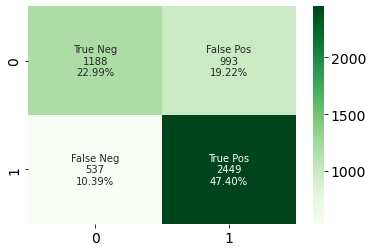

In [46]:
confusion_map(logistic, Xtest, ytest)

#### With scaling

In [47]:
Xtrain, Xtest, ytrain, ytest = prepare_data(X,y)

In [48]:
run_model(logistic, Xtrain, ytrain, Xtest, ytest)

[[1226  955]
 [ 559 2427]]


(0.7069866460228372, 0.8127930341594106, 0.7176227084565346)

<AxesSubplot:>

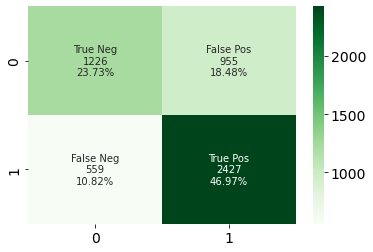

In [49]:
confusion_map(logistic, Xtest, ytest)

### SVM

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)

In [51]:
run_model(svc, Xtrain, ytrain, Xtest, ytest)

[[1175 1006]
 [ 672 2314]]


(0.6752467582736598, 0.7749497655726725, 0.696987951807229)

<AxesSubplot:>

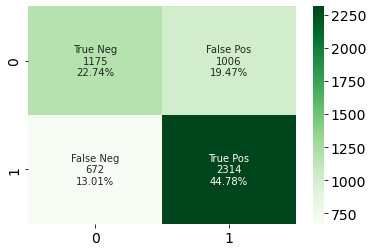

In [52]:
confusion_map(svc, Xtest, ytest)

#### With Scaling

In [53]:
Xtrain, Xtest, ytrain, ytest= prepare_data(X,y, scale=True)

In [54]:
run_model(svc, Xtrain, ytrain, Xtest, ytest)

[[1161 1020]
 [ 402 2584]]


(0.7247919489065222, 0.8653717347622237, 0.7169811320754716)

<AxesSubplot:>

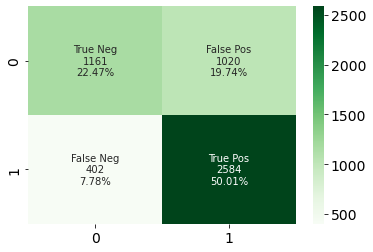

In [55]:
confusion_map(svc, Xtest,ytest)

In [56]:
#since this model performed the best I will find feature importance with it
#getting accuracy, precision, recall scores with the full auto-selected data
all_recall = recall_score(ytest, svc.predict(Xtest))
all_score = svc.score(Xtest, ytest)
all_precision = precision_score(ytest, svc.predict(Xtest))

## Feature Importance

In [58]:
column_data=[]
for i in range(10):
    #stating dropped column
    print("Dropping ",X.columns[i])
    #creating new dataframe
    dropped = X.drop(X.columns[i],axis=1)
    #getting model data 
    Xtrain, Xtest, ytrain, ytest = prepare_data(dropped,y)
    #using svc since that model performed the best
    svc = SVC()
    score,recall, precision = run_model(svc,Xtrain, ytrain,Xtest, ytest)
    confusion = confusion_matrix(ytest, svc.predict(Xtest))
    #getting difference from full data
    #added precision because I was curious
    delta_recall = all_recall-recall
    delta_score = all_score-score
    delta_precision = all_precision - precision
    #adding it to array
    column_data.append([X.columns[i],delta_recall,delta_score,delta_precision])
    #showing results
    print_results("SVM",score,recall,confusion)
    print("Score recall: ",delta_recall)
    print("\n\n")

Dropping  Gender
[[1151 1030]
 [ 401 2585]]

SVM:
  Score:  0.7230501257983356
  recall:  0.8657066309444073
  Confusion Matrix:  [[1151 1030]
 [ 401 2585]]
Score recall:  -0.00033489618218351946



Dropping  Age_at_Release
[[1132 1049]
 [ 436 2550]]

SVM:
  Score:  0.7125991871492162
  recall:  0.853985264567984
  Confusion Matrix:  [[1132 1049]
 [ 436 2550]]
Score recall:  0.011386470194239773



Dropping  Gang_Affiliated
[[1141 1040]
 [ 385 2601]]

SVM:
  Score:  0.7242113412037933
  recall:  0.8710649698593436
  Confusion Matrix:  [[1141 1040]
 [ 385 2601]]
Score recall:  -0.005693235097119831



Dropping  Prior_Arrest_Episodes_Misd
[[1161 1020]
 [ 413 2573]]

SVM:
  Score:  0.7226630539965163
  recall:  0.8616878767582049
  Confusion Matrix:  [[1161 1020]
 [ 413 2573]]
Score recall:  0.003683858004018825



Dropping  Prior_Arrest_Episodes_Property
[[1132 1049]
 [ 425 2561]]

SVM:
  Score:  0.714728082059222
  recall:  0.8576691225720027
  Confusion Matrix:  [[1132 1049]
 [ 425 256

In [59]:
#adding info to data frame
scores_df=pd.DataFrame(column_data,columns=['Column','Recall', 'Accuracy', 'Precision'])
scores_df=scores_df.sort_values("Recall",ascending=False)
scores_df

,Column,Recall,Accuracy,Precision
9,Jobs_Per_Year,0.031145,0.024966,0.014698
8,Percent_Days_Employed,0.022438,0.041417,0.033756
1,Age_at_Release,0.011386,0.012193,0.008451
6,Condition_MH_SA,0.008372,0.003871,0.000977
4,Prior_Arrest_Episodes_Property,0.007703,0.010064,0.007563
7,DrugTests_THC_Positive,0.006698,-0.000968,-0.003446
3,Prior_Arrest_Episodes_Misd,0.003684,0.002129,0.000866
5,Prior_Arrest_Episodes_PPViolationCharges,0.000000,0.007354,0.007481
0,Gender,-0.000335,0.001742,0.001905
2,Gang_Affiliated,-0.005693,0.000581,0.002617


# Decision Tree

I wanted to look at the decision tree variable importance to see if the results were similar to the way that I determined variable importance since that was used a lot during presentations. 

In [60]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)

In [61]:
tree = DecisionTreeClassifier(max_depth= 8)

In [62]:
tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=8)

In [63]:
tree.score(Xtest, ytest)

0.7036965357073737

## Random Forest 

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=13)

In [65]:
rfmodel = RandomForestClassifier(n_estimators=1000, random_state=13)
rfmodel.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, random_state=13)

In [66]:
#score because im curious
rfmodel.score(Xtest, ytest)

0.7122121153473969

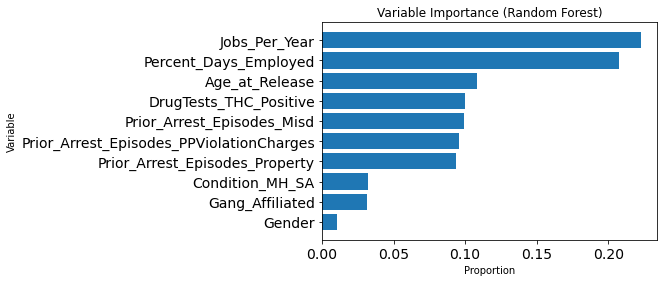

In [67]:
# plot variable importance
var_imp = pd.DataFrame({'Variable': X.columns, 
                        'Importance': rfmodel.feature_importances_})
var_imp = var_imp.sort_values(by='Importance')
plt.barh(var_imp['Variable'], var_imp['Importance'])
plt.xlabel('Proportion')
plt.ylabel('Variable')
plt.title('Variable Importance (Random Forest)')
plt.show()